# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

bond_lengths = np.linspace(0.6,1.8,10)
molecules=['h2','h2o','lih','n2','h4','nh3']
methods=['hf','cisd','ccsd','fci']
basies=['sto-3g','6-31g']

molecule='n2'
basis ='6-31g'
basis = 'sto-3g'


In [9]:
molecule=molecules[np.random.randint(len(molecules))]
basis=basies[np.random.randint(len(basies))]

molecule='n2'
basis = 'sto-3g'

print("Calculations for ",molecule.upper()," in basis:",basis.upper())

Calculations for  N2  in basis: STO-3G


In [10]:
#Run HF
%time HF_PES = obtain_PES(molecule, bond_lengths, basis,  method='hf')

r=0.6000, E = -103.88092 Eh
r=0.7333, E = -106.09616 Eh
r=0.8667, E = -107.05691 Eh
r=1.0000, E = -107.41977 Eh
r=1.1333, E = -107.50089 Eh
r=1.2667, E = -107.45540 Eh
r=1.4000, E = -107.35804 Eh
r=1.5333, E = -107.24348 Eh
r=1.6667, E = -107.12749 Eh
r=1.8000, E = -107.01757 Eh
CPU times: user 11.1 s, sys: 124 ms, total: 11.2 s
Wall time: 11.3 s


In [11]:
#Run CISD
%time CISD_PES = obtain_PES(molecule, bond_lengths, basis,  method='cisd')

r=0.6000, E = -103.93079 Eh
r=0.7333, E = -106.16718 Eh
r=0.8667, E = -107.15123 Eh
r=1.0000, E = -107.54139 Eh
r=1.1333, E = -107.65407 Eh
r=1.2667, E = -107.64349 Eh
r=1.4000, E = -107.58327 Eh
r=1.5333, E = -107.50768 Eh
r=1.6667, E = -107.43287 Eh
r=1.8000, E = -107.36645 Eh
CPU times: user 5.93 s, sys: 79.7 ms, total: 6.01 s
Wall time: 6.27 s


In [12]:
#Run FCI
%time FCI_PES = obtain_PES(molecule, bond_lengths, basis, method='fci')

r=0.6000, E = -103.93173 Eh
r=0.7333, E = -106.16929 Eh
r=0.8667, E = -107.15541 Eh
r=1.0000, E = -107.54930 Eh
r=1.1333, E = -107.66847 Eh
r=1.2667, E = -107.66825 Eh
r=1.4000, E = -107.62317 Eh
r=1.5333, E = -107.56797 Eh
r=1.6667, E = -107.51900 Eh
r=1.8000, E = -107.48346 Eh
CPU times: user 11.1 s, sys: 189 ms, total: 11.3 s
Wall time: 11.4 s


In [13]:
#Run CCSD
%time CCSD_PES = obtain_PES(molecule, bond_lengths, basis,  method='ccsd')

r=0.6000, E = -103.93127 Eh
r=0.7333, E = -106.16843 Eh
r=0.8667, E = -107.15392 Eh
r=1.0000, E = -107.54672 Eh
r=1.1333, E = -107.66396 Eh
r=1.2667, E = -107.66066 Eh
r=1.4000, E = -107.61165 Eh
r=1.5333, E = -107.55400 Eh
r=1.6667, E = -107.51099 Eh
r=1.8000, E = -107.50300 Eh
CPU times: user 7.44 s, sys: 1.33 s, total: 8.78 s
Wall time: 10.4 s


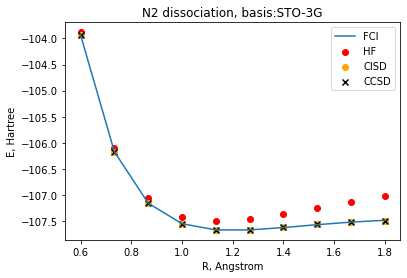

In [14]:
#Plot the PESs

title_text=molecule.upper()+' dissociation, basis:'+basis.upper()
plt.title(title_text)
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='r')
plt.scatter(bond_lengths, CCSD_PES, label='CISD', marker='o',color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD',  marker='x', color='k')
plt.legend()